Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.


In [78]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
train = pd.read_csv("Train.csv") 
test = pd.read_csv("Test.csv")

In [80]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [82]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [83]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


In [84]:
print("Missing Values:\n",data.isnull().sum())

Missing Values:
 Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64


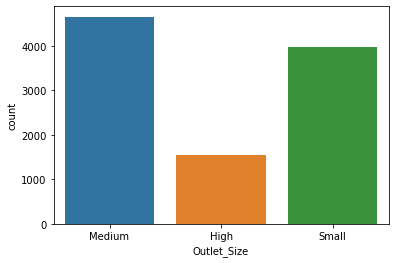

In [85]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())
sns.countplot(data.Outlet_Size)

In [86]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')
print("Missing Values:\n",data.isnull().sum())

Missing Values:
 Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64


In [87]:
#print("Checking for duplicates in Item_identifire\n")
#uniqueIds = len(set(train.Item_Identifier))
#totalIds = train.shape[0]
#duplicatesIds = totalIds - uniqueIds
#print("Total IDs: ",totalIds)
#print("Unique IDs: ",uniqueIds)
#print("Duplicate IDs: ",duplicatesIds)

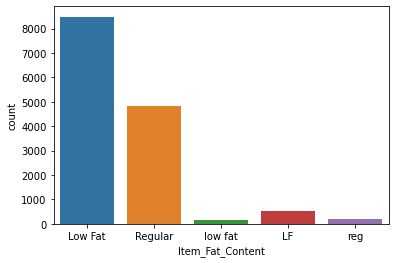

In [88]:
#counting categories of fat content
sns.countplot(data.Item_Fat_Content)

In [89]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [90]:
data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace =True)
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

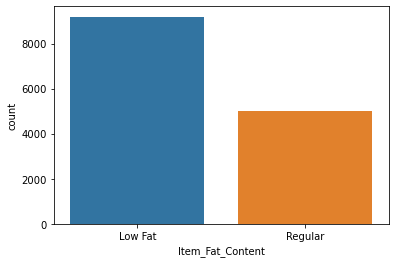

In [91]:
sns.countplot(data.Item_Fat_Content)

In [92]:
data["Item_Visibility"].describe() #minimum value is zero which is not possible

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [93]:
itemWiseMeanVisibility = data.groupby('Item_Identifier').Item_Visibility.mean()
itemWiseMeanVisibility.head()

Item_Identifier
DRA12    0.034938
DRA24    0.045646
DRA59    0.133384
DRB01    0.079736
DRB13    0.006799
Name: Item_Visibility, dtype: float64

In [94]:
mask = data['Item_Visibility']==0
mask.head(10)

0    False
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9    False
Name: Item_Visibility, dtype: bool

In [95]:
data.loc[mask,'Item_Visibility'] = itemWiseMeanVisibility[data.loc[mask, 'Item_Identifier']].values
data["Item_Visibility"].describe()
#data.head(10)

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [96]:
print("Missing Values:\n",data.isnull().sum())

Missing Values:
 Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64


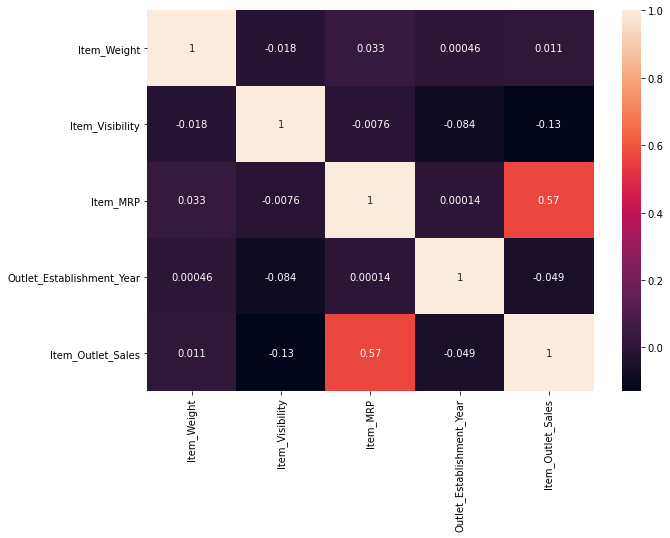

In [97]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(data.corr(), annot=True, ax=ax)

Performing One Hot Encoding

In [98]:
#column which need to be encoded
colEncoding = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
           'Outlet_Location_Type', 'Outlet_Type','Outlet_Size']

In [99]:
from sklearn.preprocessing import LabelEncoder

for x in colEncoding:
  lb_encoder = LabelEncoder()
  data[x] = lb_encoder.fit_transform(data[x])
  le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
  print(le_name_mapping)

{'DRA12': 0, 'DRA24': 1, 'DRA59': 2, 'DRB01': 3, 'DRB13': 4, 'DRB24': 5, 'DRB25': 6, 'DRB48': 7, 'DRC01': 8, 'DRC12': 9, 'DRC13': 10, 'DRC24': 11, 'DRC25': 12, 'DRC27': 13, 'DRC36': 14, 'DRC49': 15, 'DRD01': 16, 'DRD12': 17, 'DRD13': 18, 'DRD15': 19, 'DRD24': 20, 'DRD25': 21, 'DRD27': 22, 'DRD37': 23, 'DRD49': 24, 'DRD60': 25, 'DRE01': 26, 'DRE03': 27, 'DRE12': 28, 'DRE13': 29, 'DRE15': 30, 'DRE25': 31, 'DRE27': 32, 'DRE37': 33, 'DRE48': 34, 'DRE49': 35, 'DRE60': 36, 'DRF01': 37, 'DRF03': 38, 'DRF13': 39, 'DRF15': 40, 'DRF23': 41, 'DRF25': 42, 'DRF27': 43, 'DRF36': 44, 'DRF37': 45, 'DRF48': 46, 'DRF49': 47, 'DRF51': 48, 'DRF60': 49, 'DRG01': 50, 'DRG03': 51, 'DRG11': 52, 'DRG13': 53, 'DRG15': 54, 'DRG23': 55, 'DRG25': 56, 'DRG27': 57, 'DRG36': 58, 'DRG37': 59, 'DRG39': 60, 'DRG48': 61, 'DRG49': 62, 'DRG51': 63, 'DRH01': 64, 'DRH03': 65, 'DRH11': 66, 'DRH13': 67, 'DRH15': 68, 'DRH23': 69, 'DRH25': 70, 'DRH36': 71, 'DRH37': 72, 'DRH39': 73, 'DRH49': 74, 'DRH51': 75, 'DRH59': 76, 'DRI01':

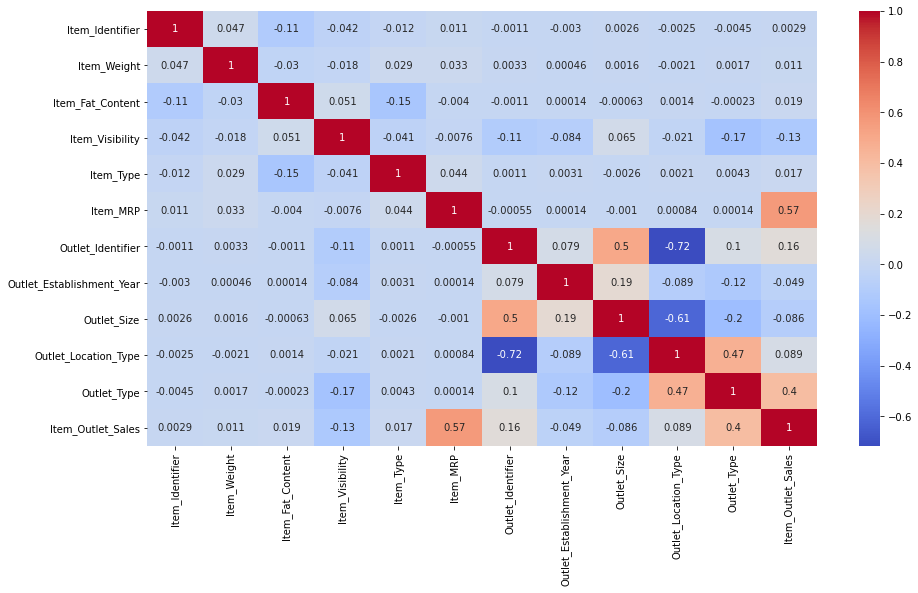

In [100]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.heatmap(data.corr(), annot=True,cmap='coolwarm', ax=ax)

In [101]:
import warnings
warnings.filterwarnings('ignore')
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
#dropping source col
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [102]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.017834,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.009780,9,53.8614,1,1987,0,2,1,994.7052


In [103]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,1114,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
8524,1078,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
8525,1420,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
8526,817,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
8527,1197,12.792854,1,0.118599,4,234.2300,5,1985,1,2,3


In [104]:
#exporting modified dataset
train.to_csv("modified_train_dataset.csv",index=False)
test.to_csv("modified_test_dataset.csv",index=False)

In [105]:
# Reading modified dataset
newtrain = pd.read_csv("modified_train_dataset.csv")
newtest = pd.read_csv("modified_test_dataset.csv")

In [106]:
newtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.017834,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.009780,9,53.8614,1,1987,0,2,1,994.7052


In [120]:
X_train = newtrain.drop(['Item_Outlet_Sales'], axis=1)
Y_train = newtrain.Item_Outlet_Sales
X_test = newtest

In [123]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [124]:
Y_pred = regressor.predict(X_test)
print("Predicted Values: ",Y_pred)

Predicted Values:  [2103.20553925 1173.74075901 2200.22517558 ... 1849.84501163 3087.79325469
 1263.50813203]


In [131]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import  metrics
lr_accuracy = round(regressor.score(X_train,Y_train) * 100,3)
print("Accuracy: ",lr_accuracy)

Accuracy:  61.336


In [132]:
r2_score(Y_train, regressor.predict(X_train))

0.6133633127074377

In [133]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, regressor.predict(X_train))))

RMSE : 1061
